In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
# sc.settings.set_figure_params(dpi=75, facecolor="white")

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 75
plt.rcParams['figure.facecolor'] = 'white'

# Read data

In [12]:
adata = sc.read_10x_mtx('/Users/ekeulseuji/Library/Containers/com.tencent.xinWeChat/Data/Library/Application Support/com.tencent.xinWeChat/2.0b4.0.9/55cf2488f424bf11185d17e30e9513be/Message/MessageTemp/d3b36ed5753abf15b52efcc51877c99c/File')
adata

KeyError: 1

In [53]:
adata.obs.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes
AAACCCAAGACAGCTG-1,2551,7.844633,8385.0,9.034319,37.948718,49.672033,59.332141,71.043530,767.0,6.643790,9.147287,1892.0,7.545918,22.564102,0.0,0.000000,0.000000,2551
AAACCCAAGTTAACGA-1,3017,8.012350,11768.0,9.373224,32.070020,45.351801,58.336166,70.912644,741.0,6.609349,6.296737,2414.0,7.789454,20.513256,0.0,0.000000,0.000000,3017
AAACCCACAGTCGCAC-1,2034,7.618251,6948.0,8.846353,40.486471,54.922280,64.335060,75.561313,387.0,5.961005,5.569948,2270.0,7.727975,32.671272,1.0,0.693147,0.014393,2034
AAACCCAGTAGCTTGT-1,2193,7.693482,9354.0,9.143666,43.211460,59.354287,68.633740,78.629463,725.0,6.587550,7.750695,3696.0,8.215277,39.512508,0.0,0.000000,0.000000,2193
AAACCCATCTGCCCTA-1,2632,7.875879,8973.0,9.102087,36.799287,49.615513,59.656748,71.124485,698.0,6.549651,7.778892,2246.0,7.717351,25.030649,0.0,0.000000,0.000000,2632


In [55]:
adata.var.head()

,gene_ids,feature_types,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,ENSG00000238009,Gene Expression,False,False,False,23,0.004462,0.004452,99.553831,23.0,3.178054,23,False,0.003856,-0.066601,-1.215084
AL669831.5,ENSG00000237491,Gene Expression,False,False,False,392,0.085742,0.082264,92.395732,442.0,6.093570,392,False,0.084026,0.594189,0.206310
FAM87B,ENSG00000177757,Gene Expression,False,False,False,14,0.002716,0.002712,99.728419,14.0,2.708050,14,False,0.002014,0.325150,-0.372408
LINC00115,ENSG00000225880,Gene Expression,False,False,False,274,0.056644,0.055098,94.684772,292.0,5.680172,274,True,0.065744,1.222872,1.558640
FAM41C,ENSG00000230368,Gene Expression,False,False,False,145,0.028904,0.028494,97.187197,149.0,5.010635,145,False,0.027496,0.242104,-0.551044


#### obs包含细胞信息 
#### var 包含基因信息 

In [63]:
adata.var.mt.value_counts()

mt
False    19027
True        13
Name: count, dtype: int64

In [65]:
adata.var.hb.value_counts()

hb
False    19032
True         8
Name: count, dtype: int64

# Quality Control

### 额外计算几个列

In [21]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [23]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

In [68]:
adata

AnnData object with n_obs × n_vars = 5122 × 19040
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

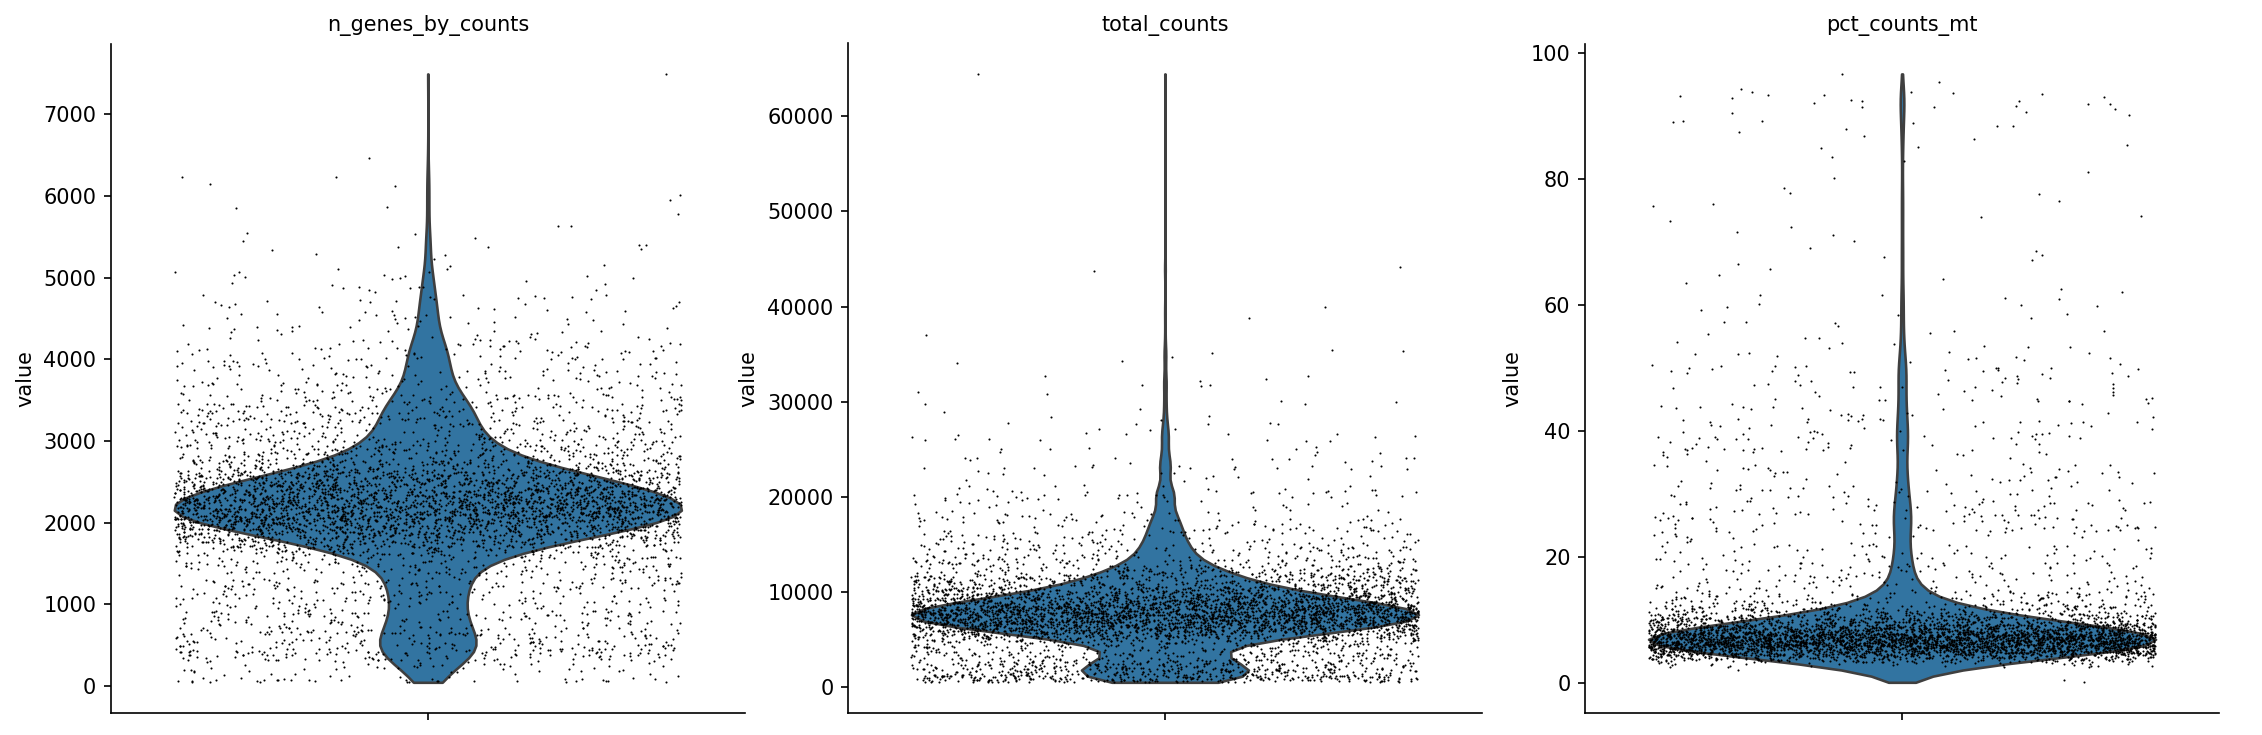

In [24]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [74]:
# 算基因
adata.obs['logC'] = np.log10(adata.obs['total_counts'])
adata.obs['logG'] = np.log10(adata.obs['n_genes_by_counts'])

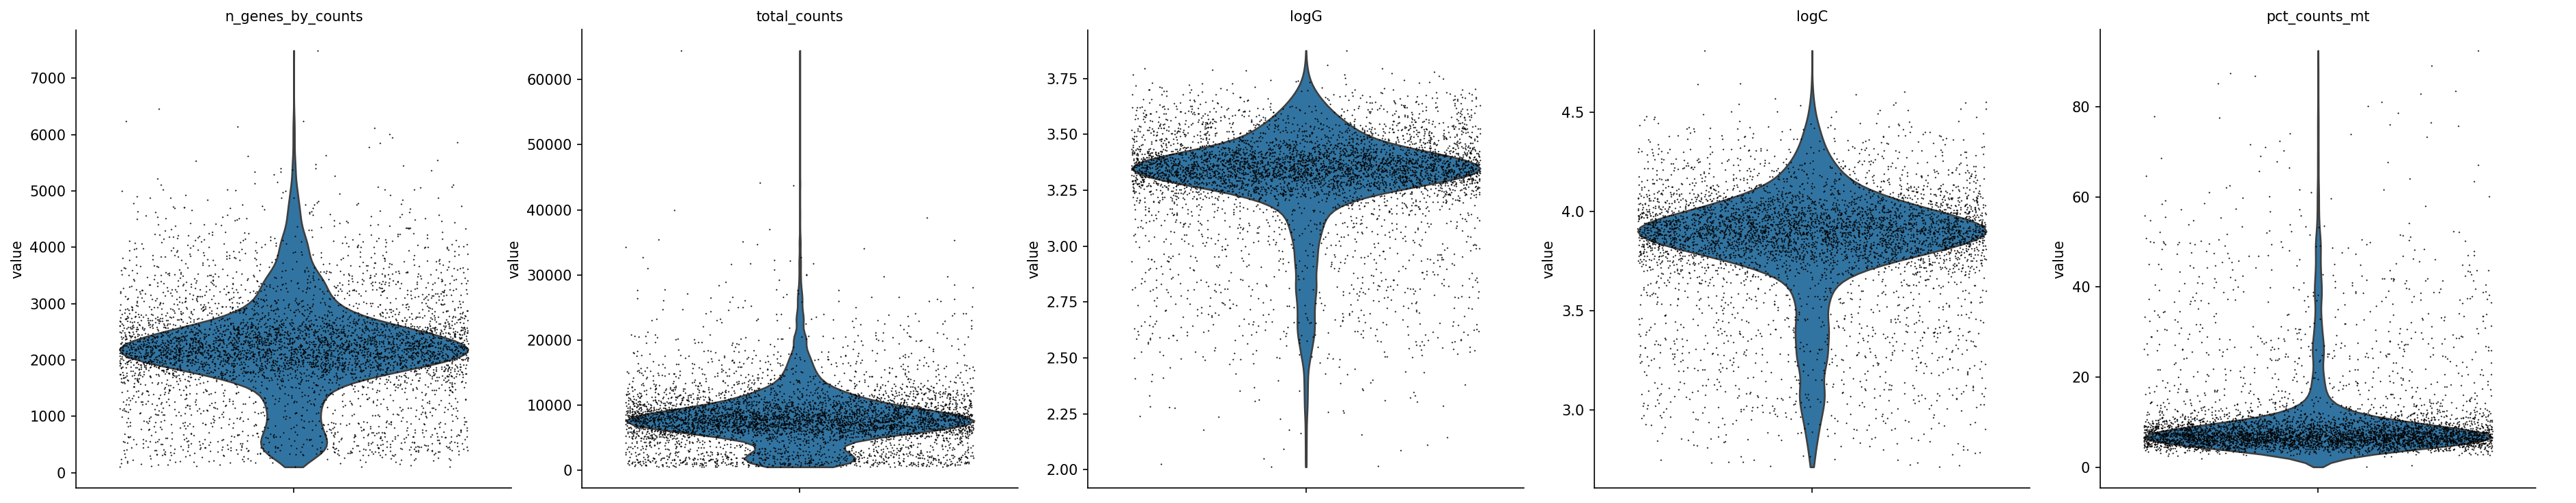

In [76]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "logG", "logC", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

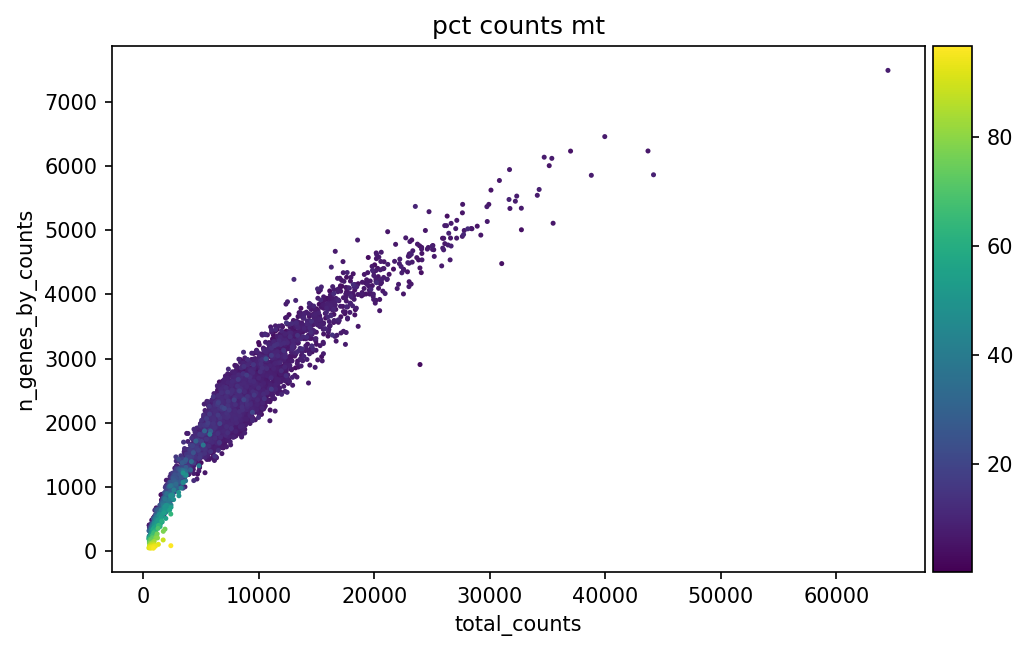

In [25]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [26]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [80]:
sc.pp.filter_genes(adata, min_cells=3)
adata

AnnData object with n_obs × n_vars = 5122 × 19040
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'logC', 'logG'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

# Normalisation

#### CPM之类的, 但是要留一下原始的矩阵, 以后要用

#### adata.layers['counts'] 出原始的计数矩阵

In [28]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

In [29]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [90]:
# 基因表达是跨数量级的 低的很低高很高 要去到归一起
'''
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata
'''

'\nsc.pp.normalize_total(adata, target_sum=1e4)\nsc.pp.log1p(adata)\nadata\n'

# Feature selection

In [31]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata # 有highly_var, mean, dispersion, dispersions_norm根据表达量归一化

In [92]:
adata.var.highly_variable.value_counts()

highly_variable
False    17040
True      2000
Name: count, dtype: int64

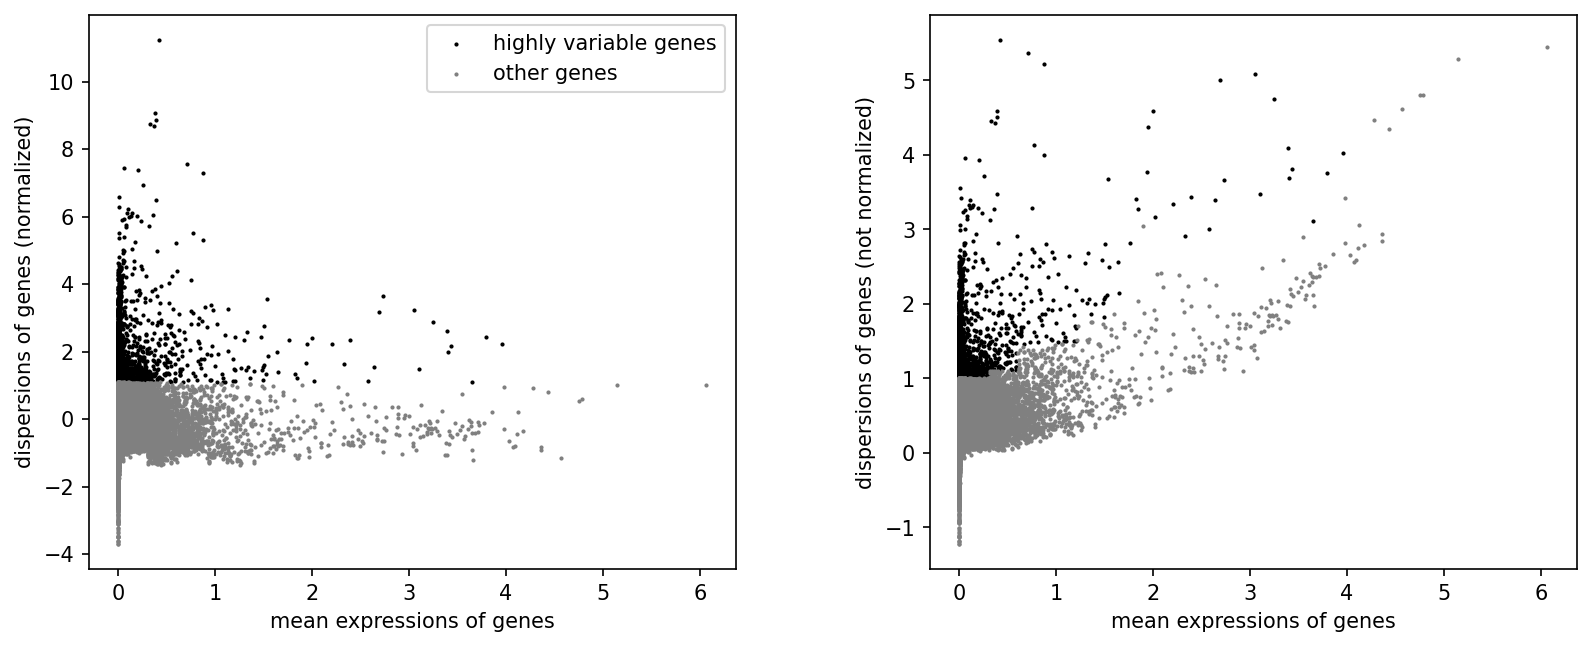

In [32]:
sc.pl.highly_variable_genes(adata)

# Dimensionality Reduction

In [34]:
sc.tl.pca(adata)

In [94]:
adata.obsm['X_pca']

array([[-3.7878530e+00,  4.0105524e+00,  1.9024942e+00, ...,
         1.1642581e+00,  5.4718435e-02, -2.5993374e-01],
       [ 1.3089656e+01, -3.2240835e-01,  4.6820727e-01, ...,
         8.9992797e-01,  7.1591991e-01,  4.3717176e-02],
       [-3.6388457e+00, -2.4284391e-01, -2.6056862e+00, ...,
        -1.0471795e-01, -2.0315792e-01,  4.3924904e-01],
       ...,
       [-3.1954539e-01, -8.1402159e+00,  5.5210676e+00, ...,
        -5.3620827e-01,  2.6757693e-01, -2.5724769e-01],
       [-1.3141961e+00, -8.1971302e+00,  4.2259879e+00, ...,
         4.8738223e-01,  7.8568417e-01, -9.2399366e-02],
       [-3.9696088e+00,  2.3347372e-03, -2.6536362e+00, ...,
         5.3904712e-01, -4.0760836e-01,  2.2203767e-01]], dtype=float32)

#### 每个pc解释多少的variation

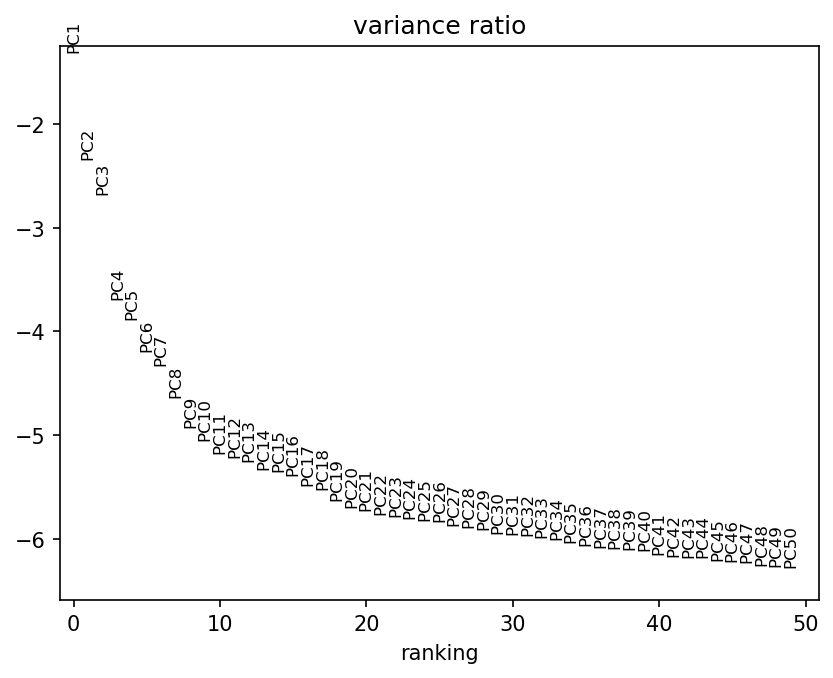

In [35]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

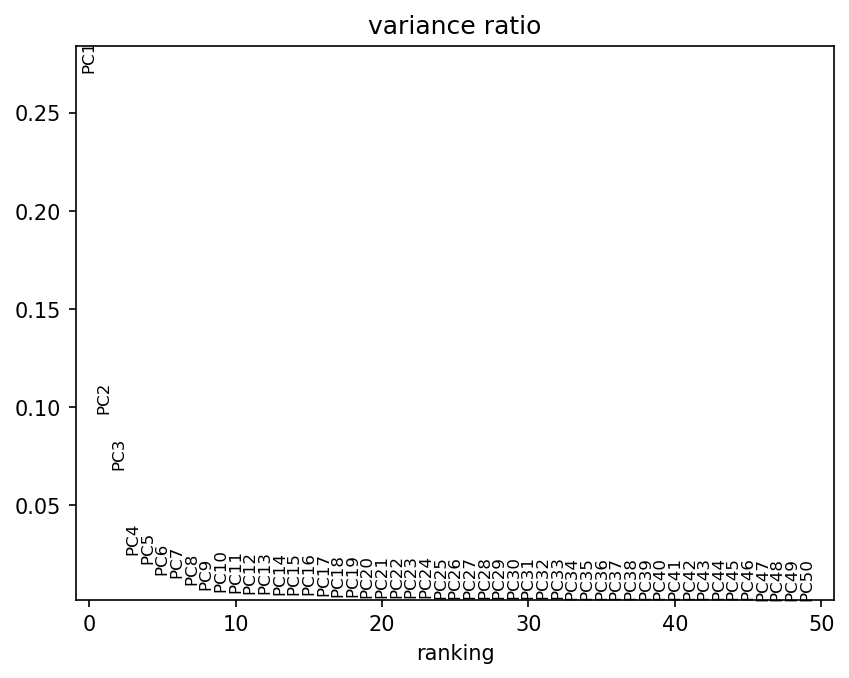

In [99]:
# 不那么平缓
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=False) 

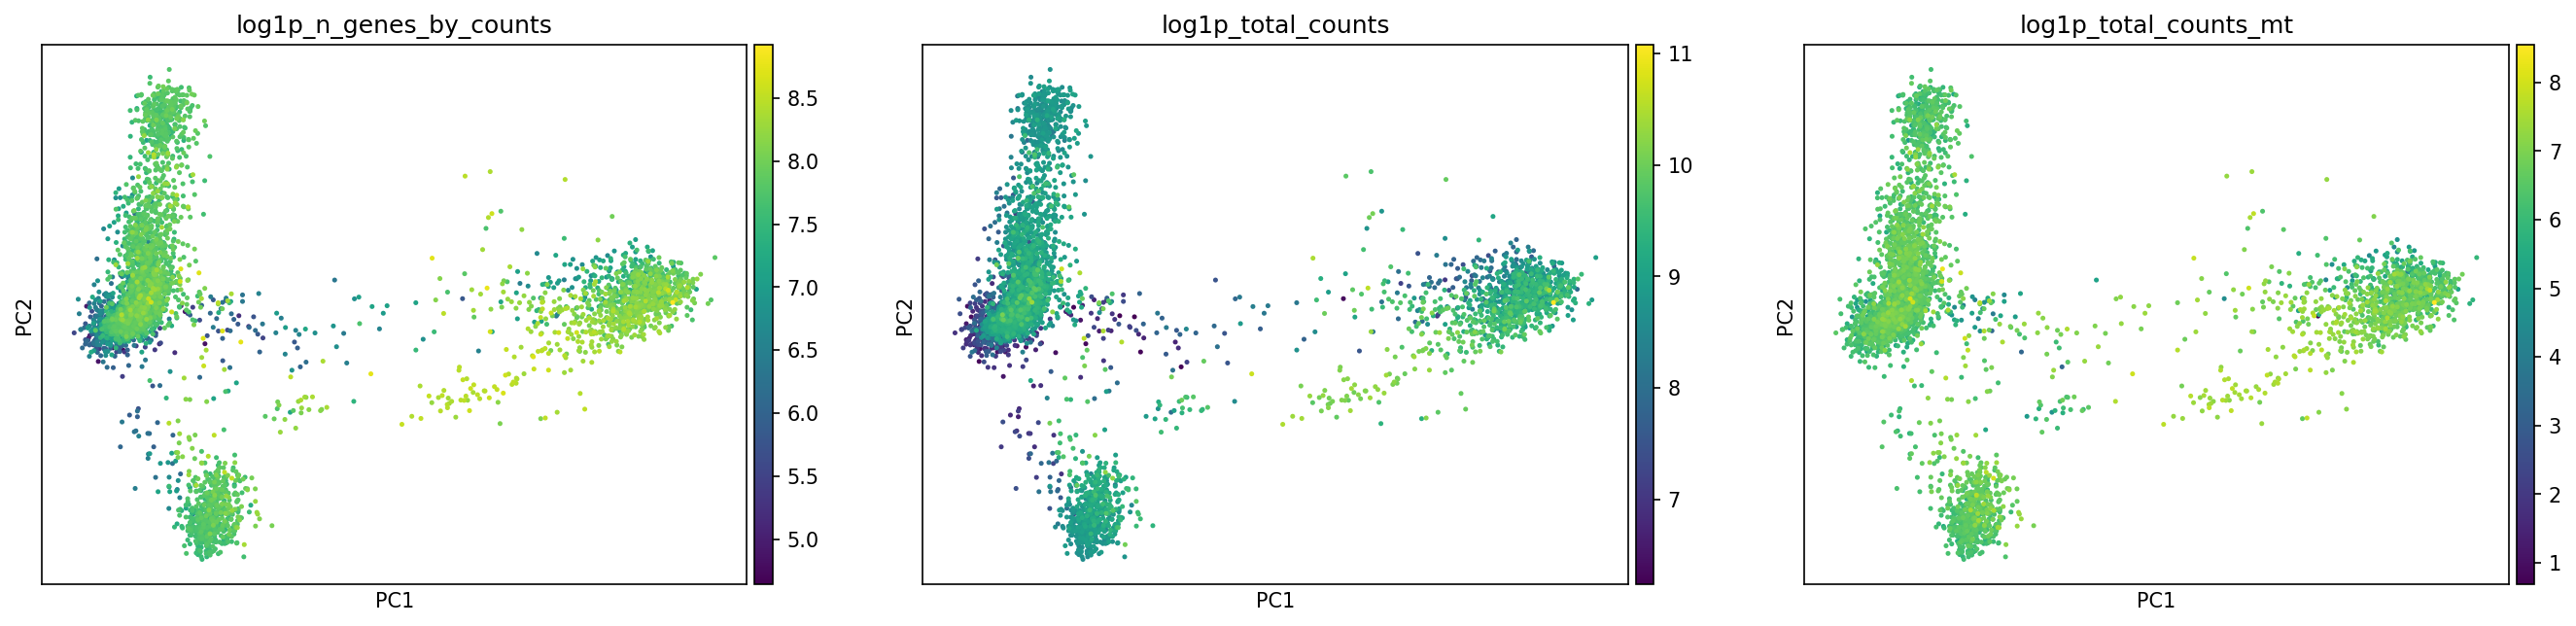

In [37]:
sc.pl.pca(
    adata,
    color=["log1p_n_genes_by_counts", "log1p_total_counts", "log1p_total_counts_mt"],
)

# Nearest neighbour graph construction and visualisation

In [43]:
sc.pp.neighbors(adata)

In [44]:
sc.tl.umap(adata)

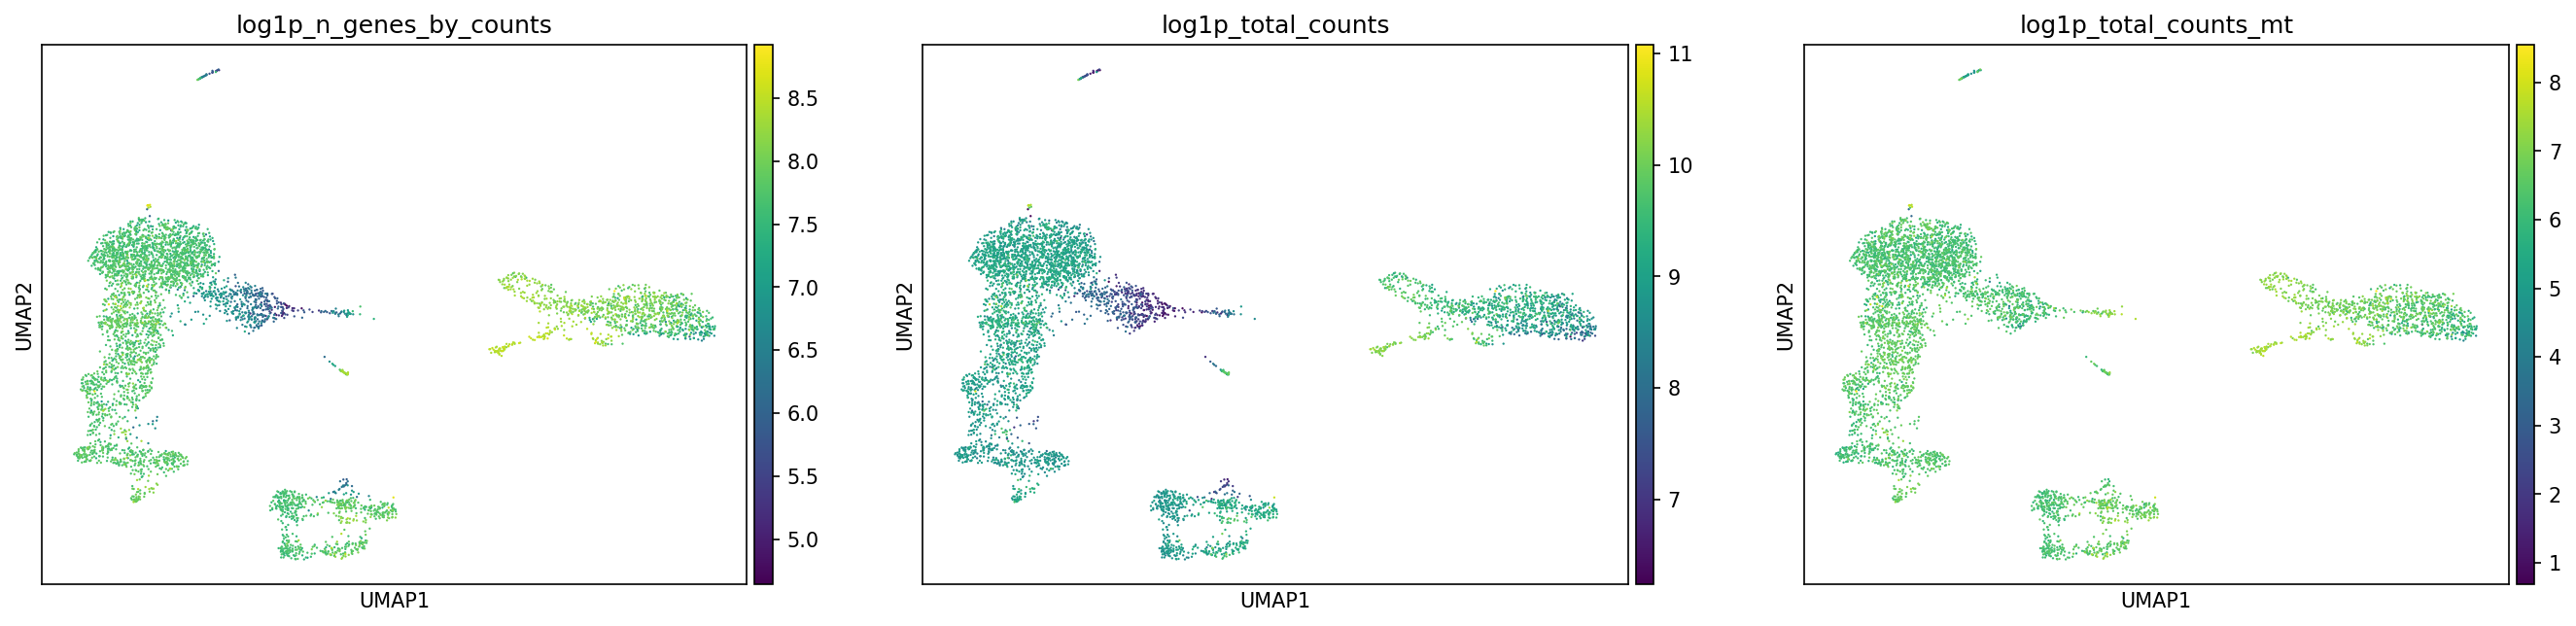

In [45]:
sc.pl.umap(
    adata,
    color=["log1p_n_genes_by_counts", "log1p_total_counts", "log1p_total_counts_mt"],
    # Setting a smaller point size to get prevent overlap
    size=5,
)

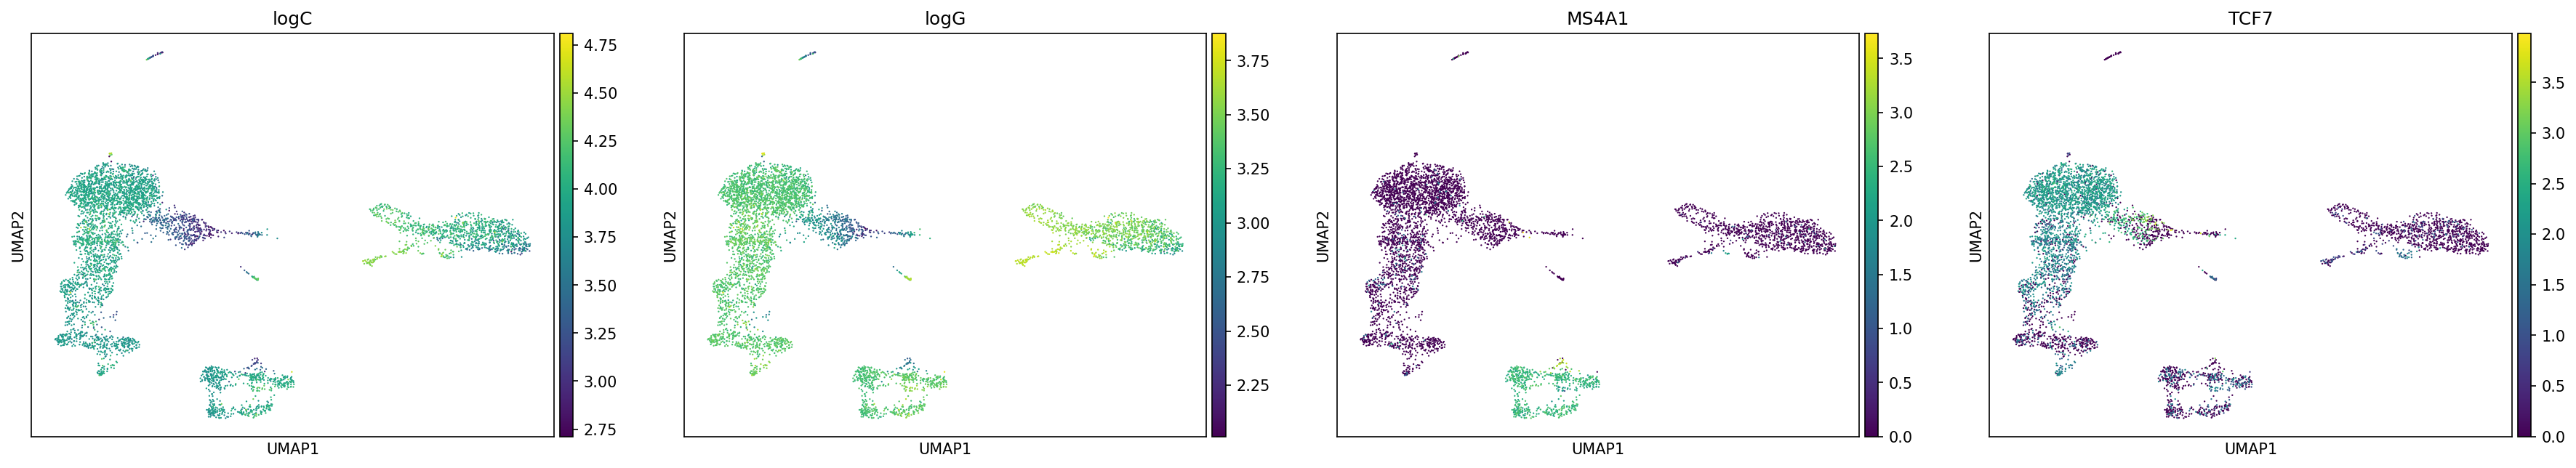

In [104]:
sc.pl.umap(
    adata,
    color=["logC", "logG", "MS4A1", "TCF7"],
    # Setting a smaller point size to get prevent overlap BPMC的相关免疫B细胞marker T细胞marker
    size=5,
)

In [113]:
# 本质上稀疏矩阵 0比较像1不太像？
adata.obsp['connectivities'] 

<5122x5122 sparse matrix of type '<class 'numpy.float32'>'
	with 113468 stored elements in Compressed Sparse Row format>

# Graph-based community detection (clustering)

In [103]:
pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [107]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)

In [124]:
# leiden是label（属于哪个cluster）
adata.obs.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,...,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes,logC,logG,leiden
AAACCCAAGACAGCTG-1,2551,7.844633,8385.0,9.034319,37.948718,49.672033,59.332141,71.043530,767.0,6.643790,...,1892.0,7.545918,22.564102,0.0,0.000000,0.000000,2551,3.923503,3.406710,0
AAACCCAAGTTAACGA-1,3017,8.012350,11768.0,9.373224,32.070020,45.351801,58.336166,70.912644,741.0,6.609349,...,2414.0,7.789454,20.513256,0.0,0.000000,0.000000,3017,4.070703,3.479575,1
AAACCCACAGTCGCAC-1,2034,7.618251,6948.0,8.846353,40.486471,54.922280,64.335060,75.561313,387.0,5.961005,...,2270.0,7.727975,32.671272,1.0,0.693147,0.014393,2034,3.841860,3.308351,4
AAACCCAGTAGCTTGT-1,2193,7.693482,9354.0,9.143666,43.211460,59.354287,68.633740,78.629463,725.0,6.587550,...,3696.0,8.215277,39.512508,0.0,0.000000,0.000000,2193,3.970997,3.341039,5
AAACCCATCTGCCCTA-1,2632,7.875879,8973.0,9.102087,36.799287,49.615513,59.656748,71.124485,698.0,6.549651,...,2246.0,7.717351,25.030649,0.0,0.000000,0.000000,2632,3.952938,3.420286,6


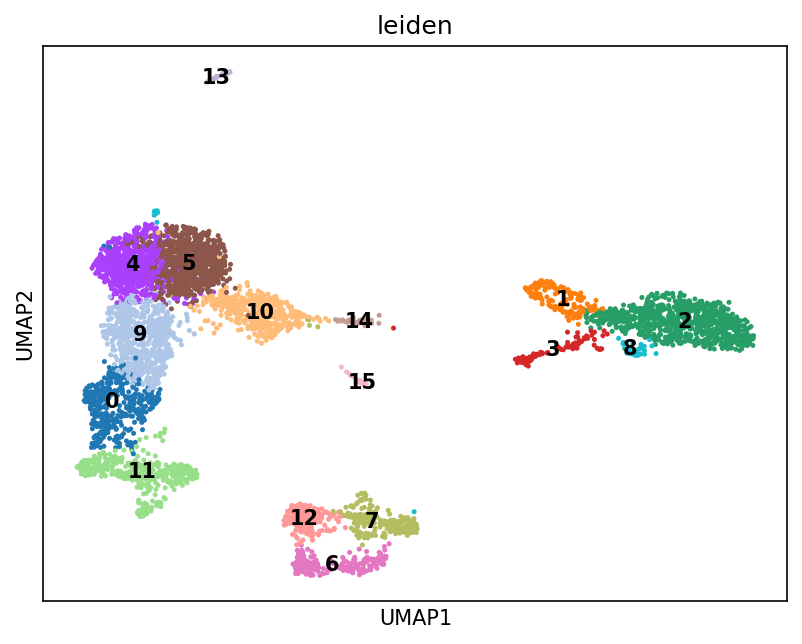

In [109]:
sc.pl.umap(adata, color=["leiden"], legend_loc='on data')

In [115]:
adata

AnnData object with n_obs × n_vars = 5122 × 19040
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'logC', 'logG', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [117]:
# 每行是细胞坐标 logC logG是比较有用的QC信息
adata.obsm['X_umap'] 

array([[-2.2370362 , -0.52458155],
       [12.669764  ,  4.8887753 ],
       [-2.4402359 ,  7.243467  ],
       ...,
       [ 5.1090593 , -7.58674   ],
       [ 3.9603655 , -7.9018188 ],
       [-0.57761633,  8.908208  ]], dtype=float32)

# Cluster specific genes

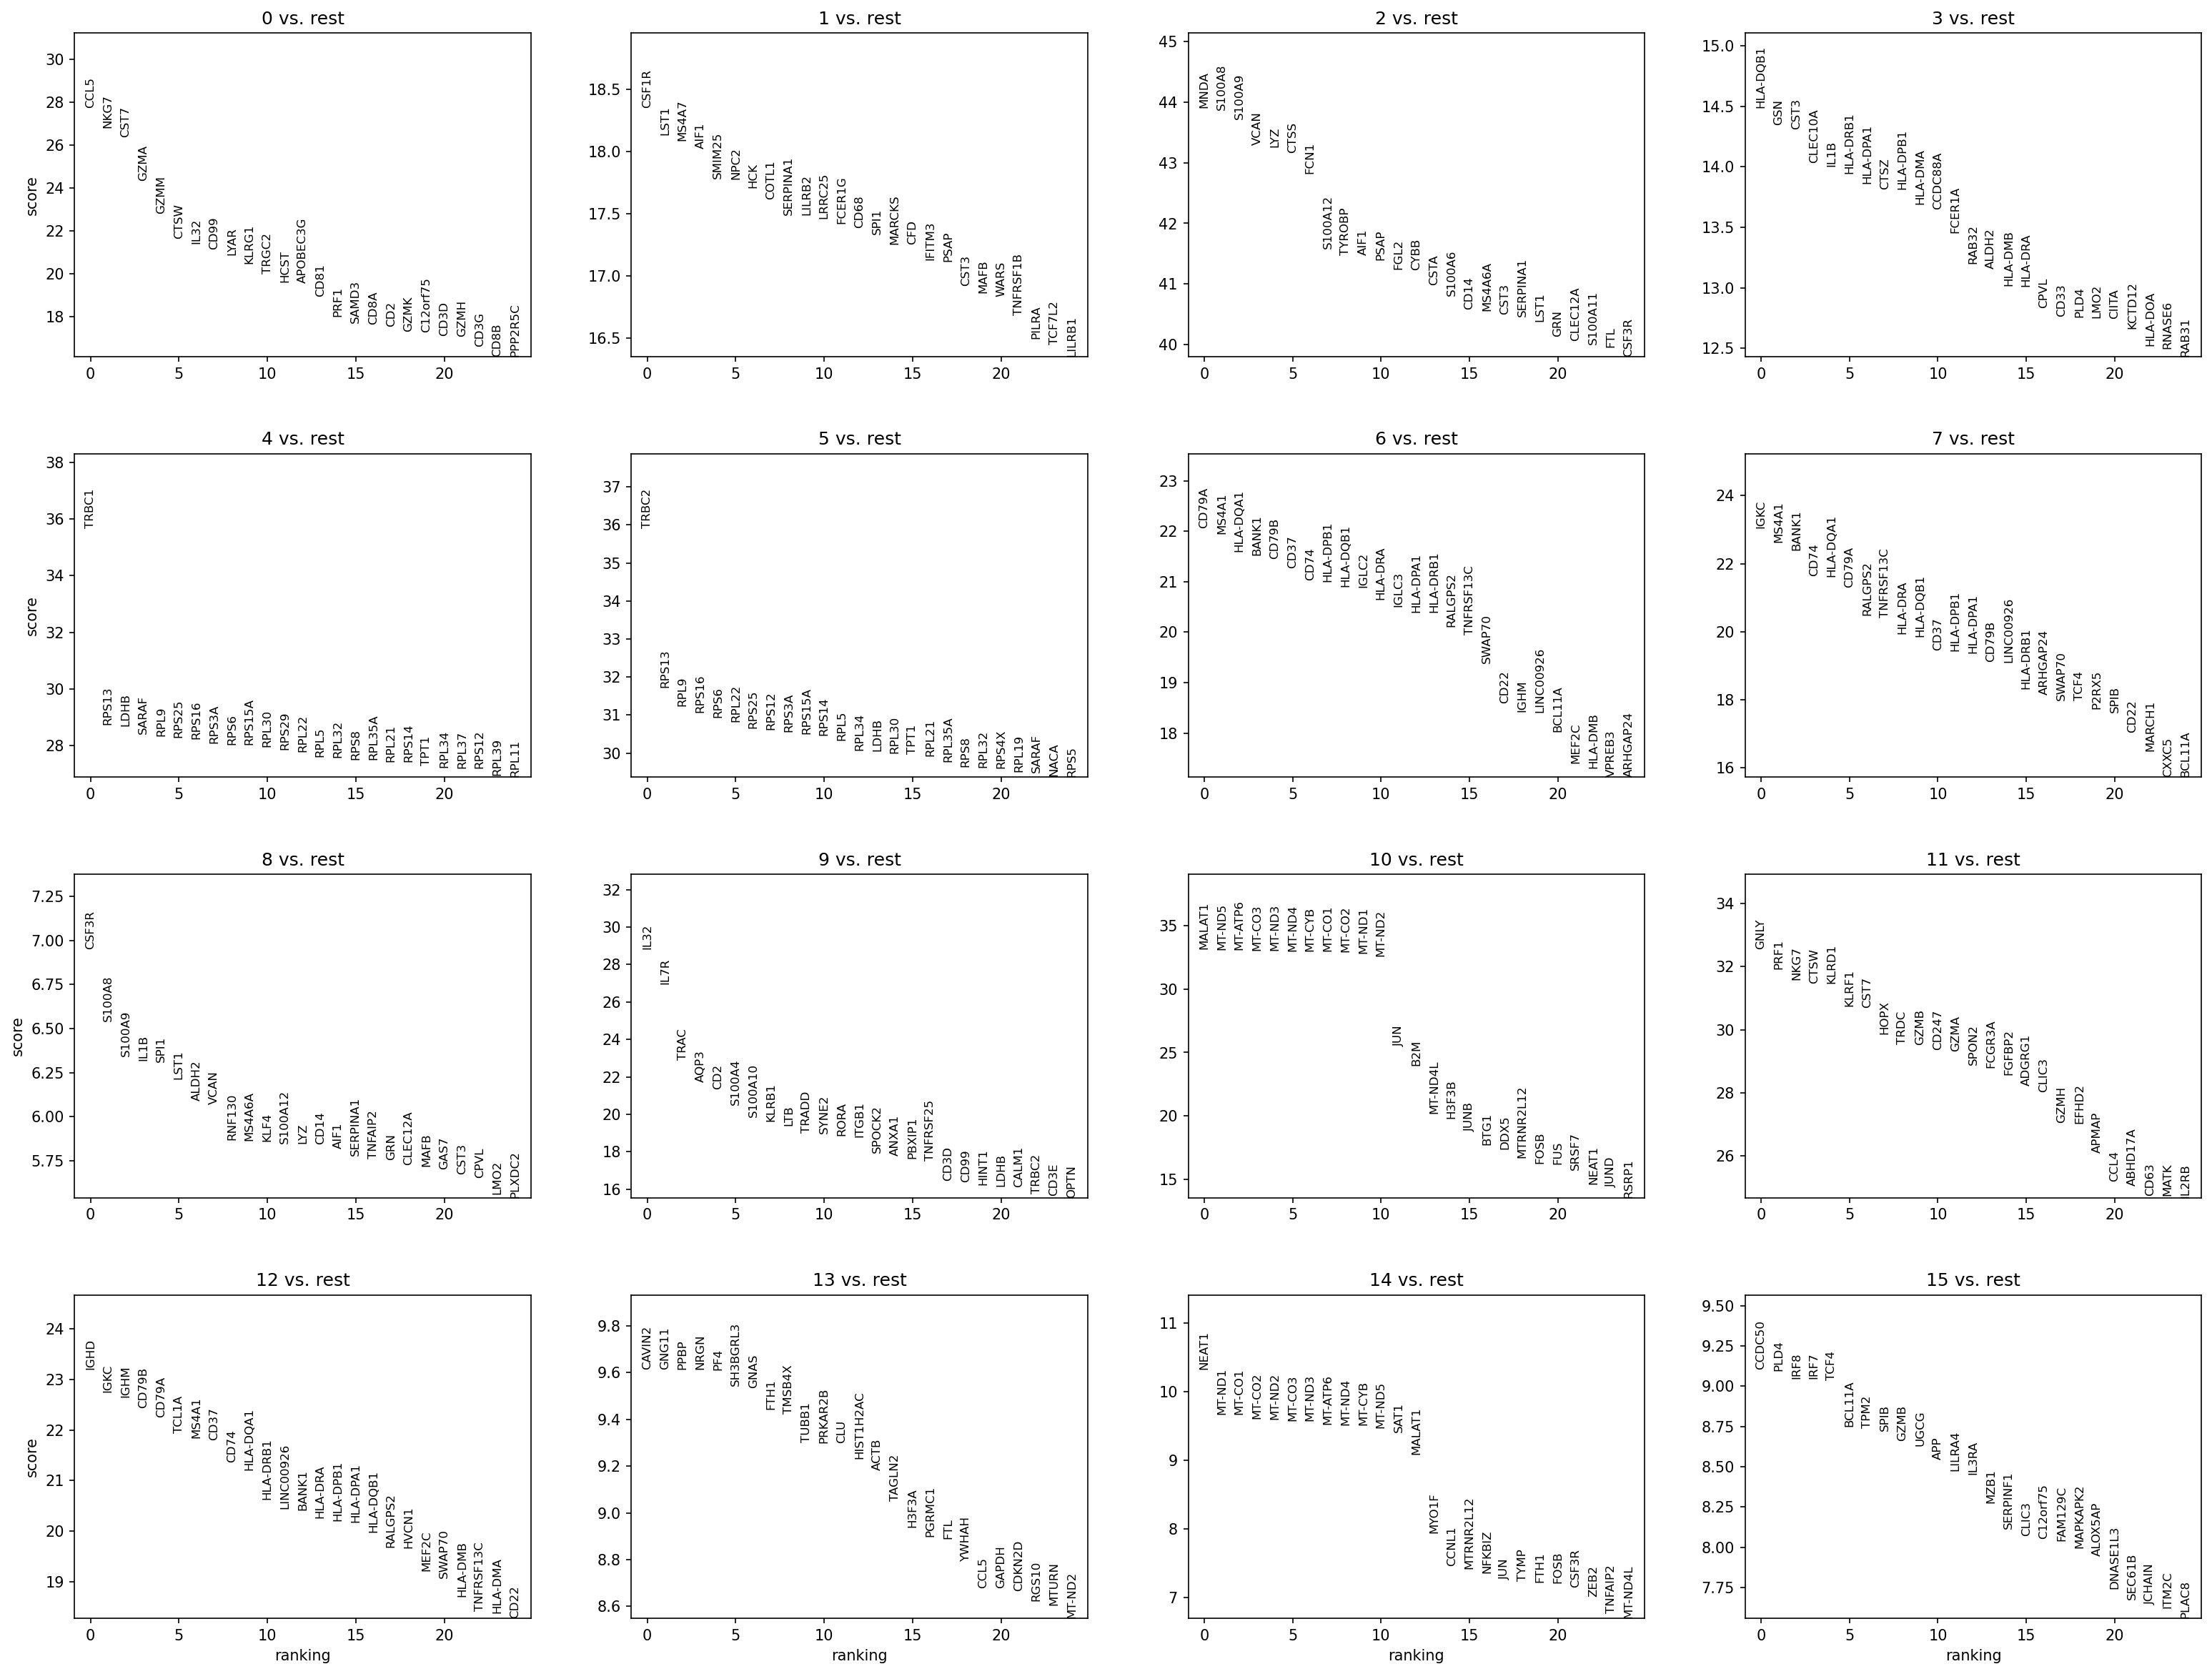

In [128]:
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [129]:
sc.get.rank_genes_groups_df(adata, group="7").head(5)

,names,scores,logfoldchanges,pvals,pvals_adj
0,IGKC,23.036074,5.780329,2.028630e-117,3.862512e-113
1,MS4A1,22.615398,5.119740,3.057627e-113,2.910861e-109
2,BANK1,22.385139,4.998460,5.493422e-111,3.486492e-107
3,CD74,21.642637,2.137992,7.130690e-104,3.394209e-100
4,HLA-DQA1,21.622694,4.609446,1.098745e-103,4.184020e-100


In [132]:
# 查看这个group的前五个marker genes
sc.get.rank_genes_groups_df(adata, group="0").head(5)

,names,scores,logfoldchanges,pvals,pvals_adj
0,CCL5,27.746284,4.351999,1.931972e-169,3.678475e-165
1,NKG7,26.797314,4.361769,3.472769e-158,3.306076e-154
2,CST7,26.387348,4.247241,1.914310e-153,1.214949e-149
3,GZMA,24.330931,3.996674,9.228936e-131,4.392973e-127
4,GZMM,22.816353,2.873889,3.155412e-115,1.201581e-111
